**create a dataframe**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**process the data**

In [ ]:
len(df)

1000

In [ ]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Review'].value_counts

<bound method IndexOpsMixin.value_counts of 0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object>

In [ ]:
df['Liked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64>

**comparing positive reviews and negative reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


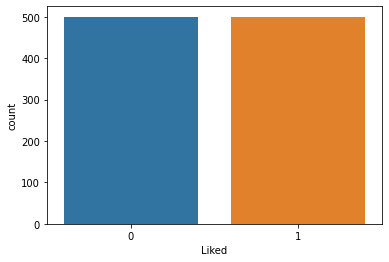

In [ ]:
sns.countplot(df['Liked'])

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
df['Review'][0]

'Wow... Loved this place.'

In [ ]:
corpus = []
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  stemmer = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
df['cleaned_text']=corpus
df.head()

,Review,Liked,cleaned_text
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


**testing and training  the data**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_text'],df['Liked'],test_size=0.2,random_state=0)

**count vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1420)
X_train_1 = cv.fit_transform(X_train).toarray()
X_test_1 = cv.transform(X_test).toarray()

**navie bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , accuracy_score


[[55 42]
 [12 91]]


0.73

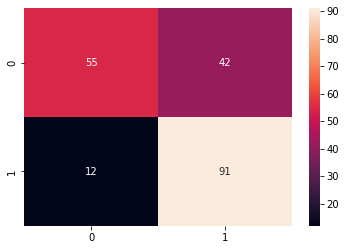

In [ ]:
Bayes_classifier = GaussianNB()
Bayes_classifier.fit(X_train_1,y_train)
y_pred = Bayes_classifier.predict(X_test_1)
cn = confusion_matrix(y_test ,y_pred)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(cn , annot=True)
accuracy_score(y_test,y_pred)

**svc model**

[[87 10]
 [34 69]]


0.78

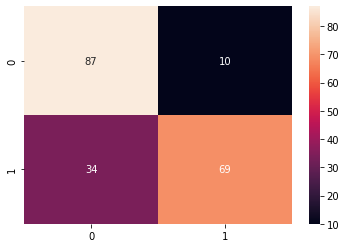

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train_1,y_train)
svc_pred = svc_classifier.predict(X_test_1)
cn = confusion_matrix(y_test ,svc_pred)
sns.heatmap(cn , annot=True)
print(confusion_matrix(y_test,svc_pred))
accuracy_score(y_test,svc_pred)





**random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

[[90  7]
 [40 63]]


0.765

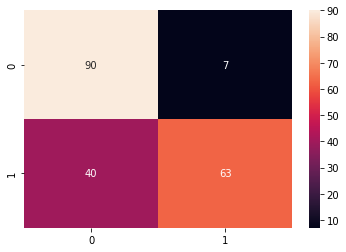

In [ ]:
RFC = RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_1,y_train)
Rfc_pred = RFC.predict(X_test_1)
print(confusion_matrix(y_test,Rfc_pred))
cn = confusion_matrix(y_test ,Rfc_pred)
sns.heatmap(cn , annot=True)

accuracy_score(y_test,Rfc_pred)

**pipelining with svc model**

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
sv_classifier = SVC(kernel='rbf')
model = Pipeline([('vectorizer',cv)
                 ,('classifier',sv_classifier)])
Pipeline(steps=[('vectorizer', CountVectorizer(max_features=1420)),
                ('classifier', SVC())])


Pipeline(steps=[('vectorizer', CountVectorizer(max_features=1420)),
                ('classifier', SVC())])

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=1420)),
                ('classifier', SVC())])

In [ ]:
example_text = ["It's worst."]
example_result = model.predict(example_text)

print(example_result)

[0]


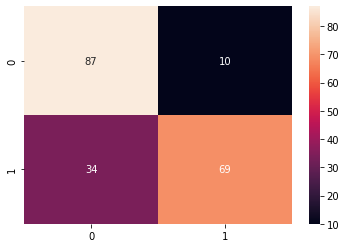

In [ ]:
cm = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True)

In [ ]:
print(accuracy_score(y_test,model.predict(X_test)))

0.78


**using joblib**

In [ ]:
import joblib
joblib.dump(model,'/content/classifier.pkl')

['/content/classifier.pkl']

In [ ]:
model_loaded= joblib.load('/content/classifier.pkl')

In [ ]:
model_loaded.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=1420)),
                ('classifier', SVC())])

In [ ]:
example_text = ["It's worst."]
example_result = model_loaded.predict(example_text)

print(example_result)

[0]


In [ ]:
example_text = ["It's best."]
example_result = model_loaded.predict(example_text)

print(example_result)

[1]
